<a href="https://colab.research.google.com/github/ashritakodali/coffee_quality_analysis/blob/Maggie/ML_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/ashritakodali/coffee_quality_analysis.git

Cloning into 'coffee_quality_analysis'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 78 (delta 23), reused 8 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 1.07 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/coffee_quality_analysis/cleaned_data/FINAL_DATA.csv")

In [5]:
display(df)

,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Altitude,Species
0,Thailand,1,10,2020,2024-10-29,Washed/Wet,8.67,8.50,8.33,8.00,...,10.0,10.00,0.112,0,0,NaN,0,2025-10-29,1443.0,Arabica
1,Thailand,1,8,2025,2025-07-08,Natural/Dry,8.25,8.50,8.33,8.25,...,10.0,10.00,0.111,0,0,Green,0,2026-07-08,1450.0,Arabica
2,Thailand,1,7,2025,2025-10-02,Natural/Dry,8.42,8.42,8.17,8.17,...,10.0,10.00,0.097,0,0,Green,0,2026-10-02,1375.0,Arabica
3,Thailand,1,8,2025,2025-08-26,Natural/Dry,8.25,8.33,8.25,8.17,...,10.0,10.00,0.129,0,0,Yellow,0,2026-08-26,1200.0,Arabica
4,Thailand,1,7,2021,2025-10-02,Washed/Wet,8.33,8.25,8.08,8.08,...,10.0,10.00,0.095,0,0,Green,3,2026-10-02,1200.0,Arabica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Vietnam,15,30,2025,2025-04-07,Natural/Dry,7.42,7.25,7.17,7.50,...,10.0,7.67,0.123,0,0,Green,0,2026-04-07,550.0,Robusta
398,Brazil,1,60,2024,2024-11-20,Washed/Wet,7.25,7.25,7.08,7.08,...,10.0,7.08,0.106,0,0,Yellow,2,2025-11-20,200.0,Robusta
399,Brazil,1,60,2024,2024-11-20,Natural/Dry,7.00,7.17,7.17,6.92,...,10.0,7.08,0.106,0,0,Brown,2,2025-11-20,232.0,Robusta
400,India,5,60,2023,2024-11-20,Washed/Wet,7.25,6.67,6.83,6.67,...,10.0,6.67,0.108,0,0,Yellow,0,2025-11-20,950.0,Robusta


Total number of defective beans: 197


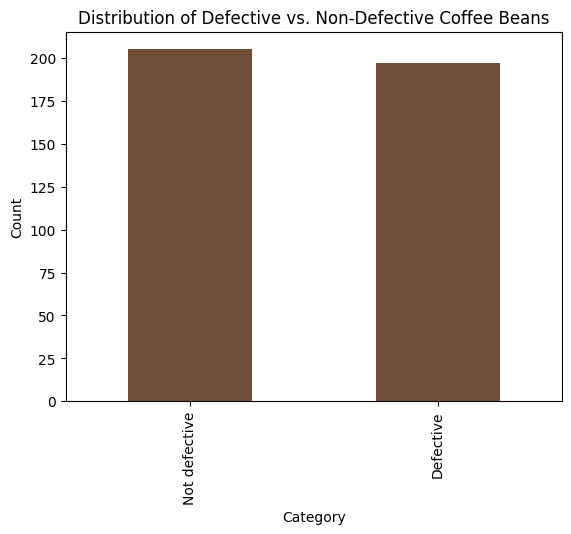

In [6]:
df['Defective'] = np.where(
    (df['Category.One.Defects'] > 0) | (df['Category.Two.Defects'] > 0),
    "Defective",
    "Not defective"
)
print("Total number of defective beans:", (df['Defective'] == "Defective").sum())

df['Defective'].value_counts().plot(kind='bar', color=['#6F4E37'])
plt.title("Distribution of Defective vs. Non-Defective Coffee Beans")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


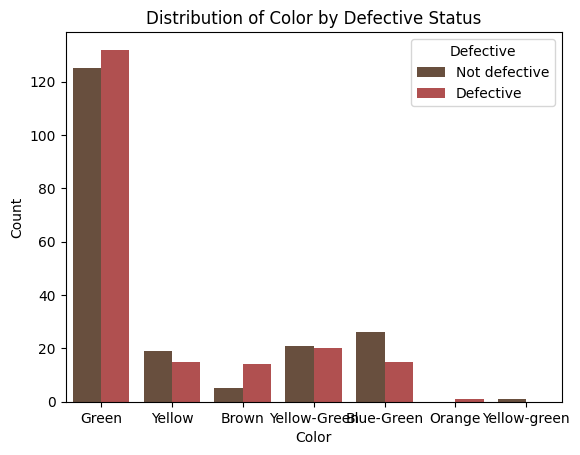

In [7]:
sns.countplot(x='Color', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Color by Defective Status")
plt.xlabel("Color")
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

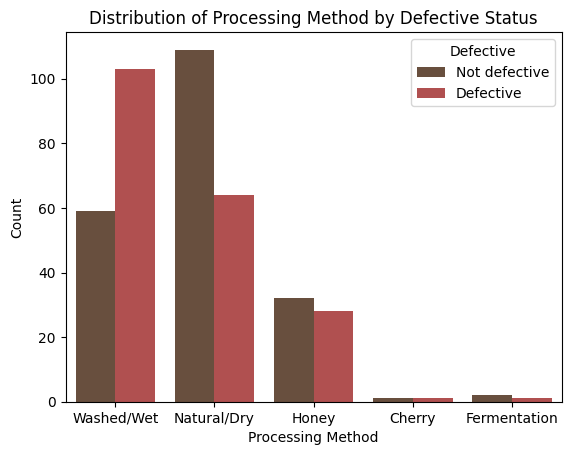

In [8]:
sns.countplot(x='Processing.Method', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Processing Method by Defective Status")
plt.xlabel("Processing Method")
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

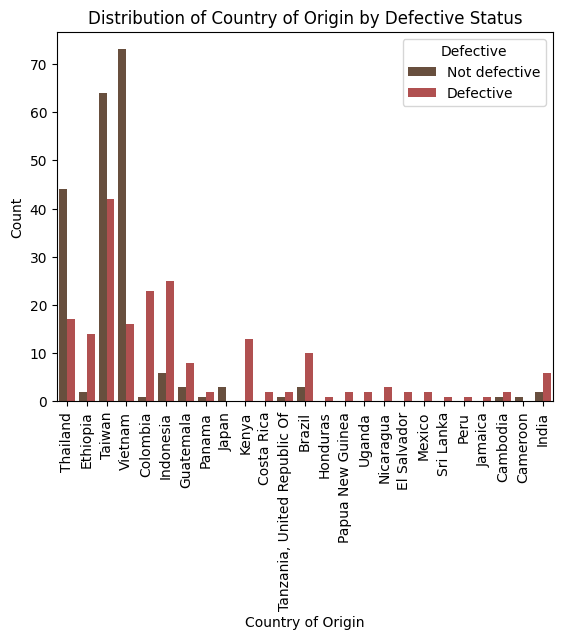

In [9]:
sns.countplot(x='Country.of.Origin', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Country of Origin by Defective Status")
plt.xlabel("Country of Origin")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

In [10]:
defective = df[df['Defective']=='Defective']

In [11]:
defective.columns

Index(['Country.of.Origin', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Altitude', 'Species',
       'Defective'],
      dtype='object')

In [12]:
defective_num = defective[['Number.of.Bags', 'Bag.Weight',
                               'Harvest.Year', 'Aroma', 'Flavor',
                               'Aftertaste', 'Acidity', 'Body',
                               'Balance', 'Uniformity', 'Clean.Cup',
                               'Sweetness','Moisture', 'Altitude']]

<Axes: >

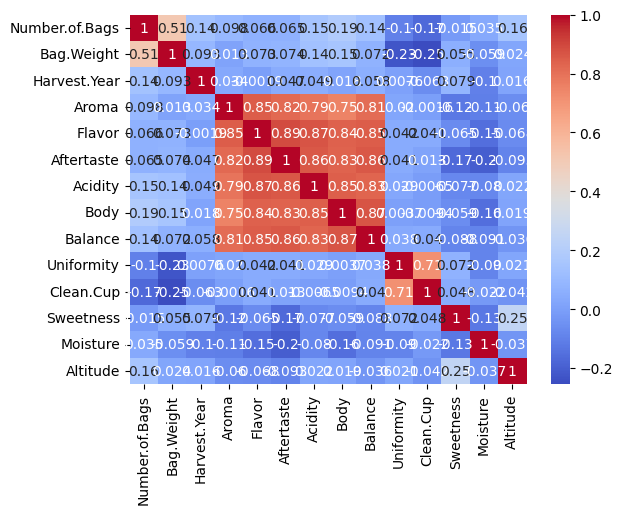

In [13]:
sns.heatmap(defective_num.corr(), annot=True, cmap='coolwarm')

Decided to not do defective and instead include it as a feature for clustering. In the shiny app I will include species as a filter option and instead cluster by species!

In [24]:
df.columns

Index(['Country.of.Origin', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Altitude', 'Species',
       'Defective'],
      dtype='object')

In [ ]:
df = df[['Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects',
       'Category.Two.Defects', 'Expiration', 'Altitude']]

Features: Taste (flavor, aftertaste, acidity, body, balance), aroma, quality control (uniformity, cup cleanliness), sweetness, moisture, total defects, age (2025-harvest year), farm altitude

In [29]:
df['Taste'] = df[['Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']].mean(axis=1)
df['Quality Control'] = df[['Uniformity', 'Clean.Cup']].mean(axis=1)
df['Age'] = 2025 - df['Harvest.Year']
df['Total Defects'] = df['Category.One.Defects'] + df['Category.Two.Defects']
df2 = df[['Species', 'Taste', 'Aroma', 'Quality Control', 'Sweetness', 'Moisture',
          'Total Defects', 'Age', 'Altitude']]

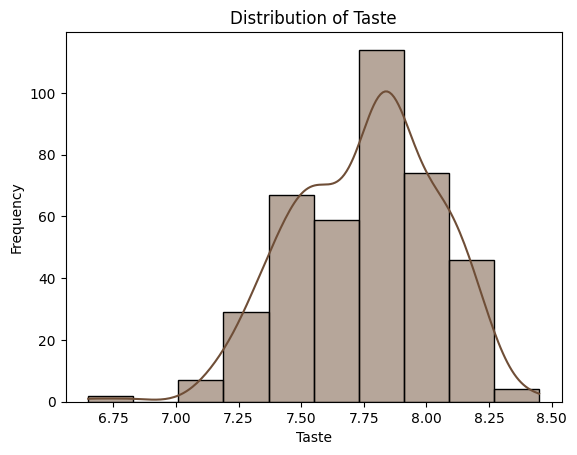

In [51]:
sns.histplot(df['Taste'], bins=10, kde=True, color='#6F4E37')
plt.title('Distribution of Taste')
plt.xlabel('Taste')
plt.ylabel('Frequency')
plt.show()

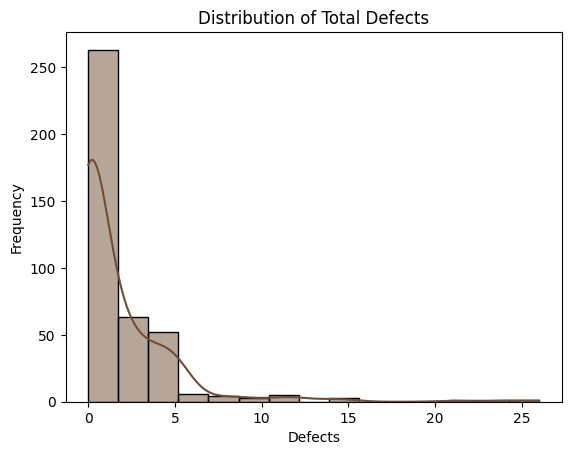

In [59]:
sns.histplot(df['Total Defects'], bins=15, kde=True, color='#6F4E37')
plt.title('Distribution of Total Defects')
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.show()

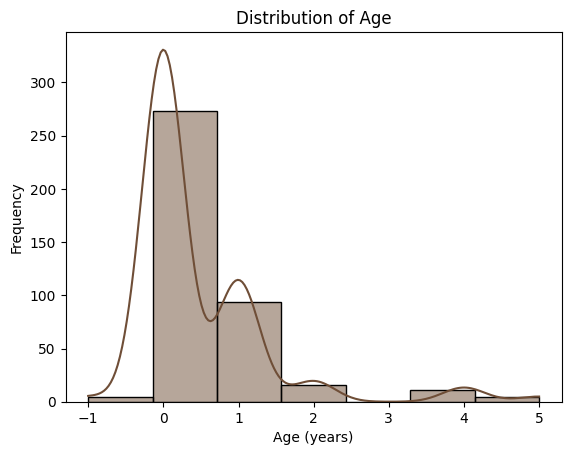

In [58]:
sns.histplot(df['Age'], bins=7, kde=True, color='#6F4E37')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

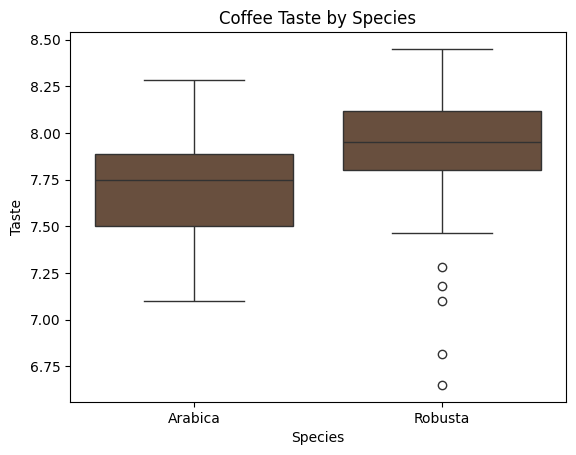

In [41]:
sns.boxplot(x=df['Species'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Taste')
plt.title(f'Coffee Taste by Species')
plt.show()

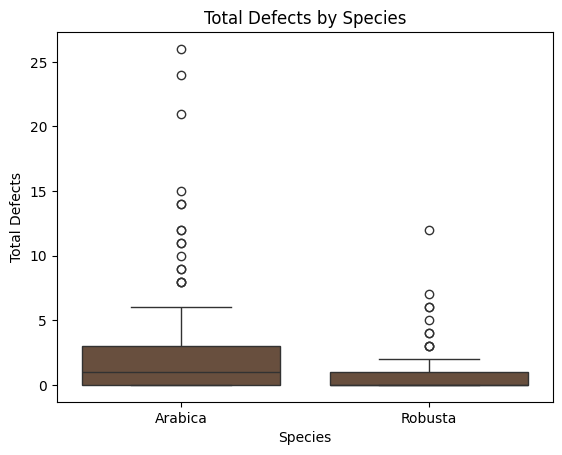

In [43]:
sns.boxplot(x=df['Species'], y=df['Total Defects'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Total Defects')
plt.title(f'Total Defects by Species')
plt.show()

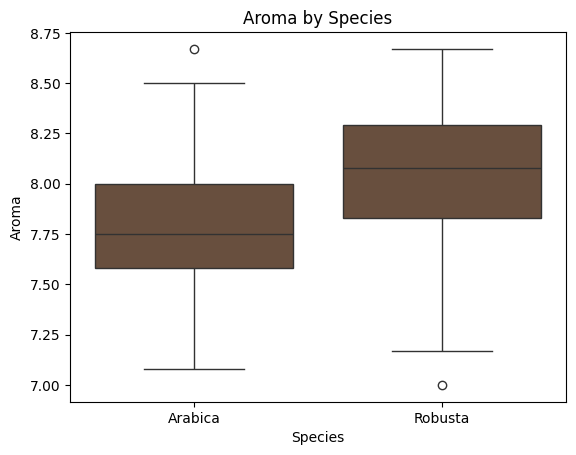

In [61]:
sns.boxplot(x=df['Species'], y=df['Aroma'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Aroma')
plt.title(f'Aroma by Species')
plt.show()

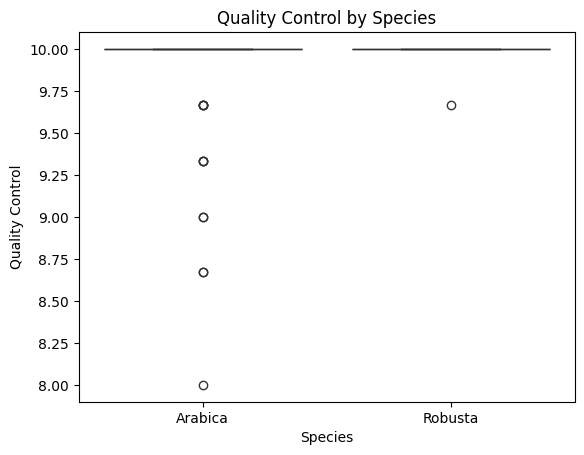

In [62]:
sns.boxplot(x=df['Species'], y=df['Quality Control'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Quality Control')
plt.title(f'Quality Control by Species')
plt.show()

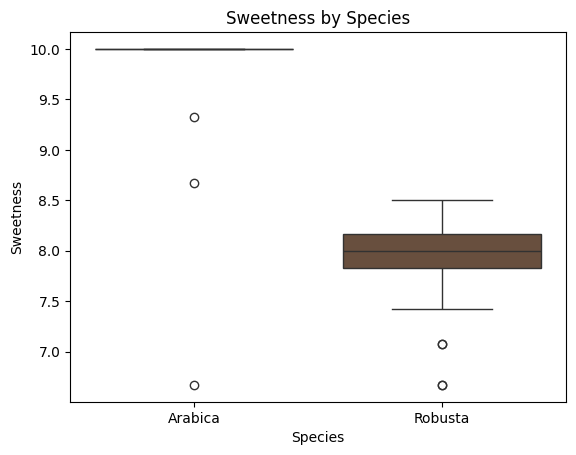

In [63]:
sns.boxplot(x=df['Species'], y=df['Sweetness'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Sweetness')
plt.title(f'Sweetness by Species')
plt.show()

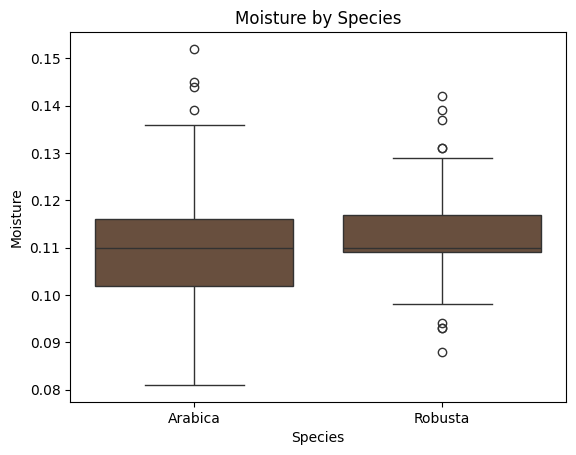

In [64]:
sns.boxplot(x=df['Species'], y=df['Moisture'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Moisture')
plt.title(f'Moisture by Species')
plt.show()

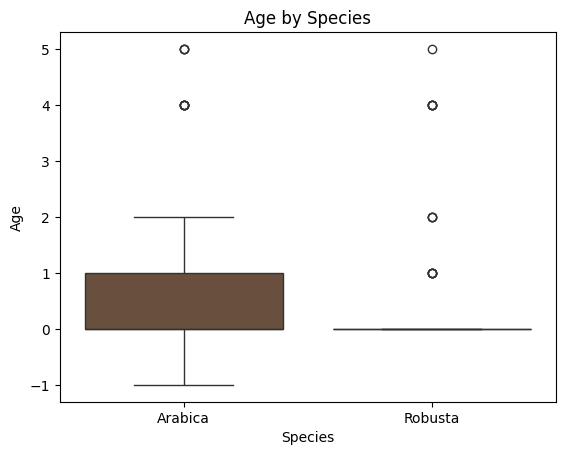

In [65]:
sns.boxplot(x=df['Species'], y=df['Age'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Age')
plt.title(f'Age by Species')
plt.show()

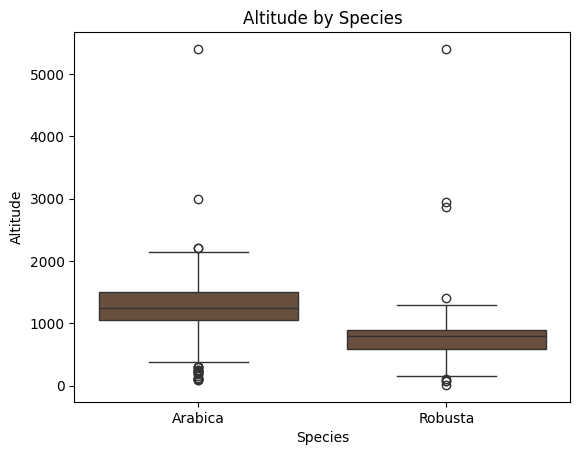

In [66]:
sns.boxplot(x=df['Species'], y=df['Altitude'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Altitude')
plt.title(f'Altitude by Species')
plt.show()

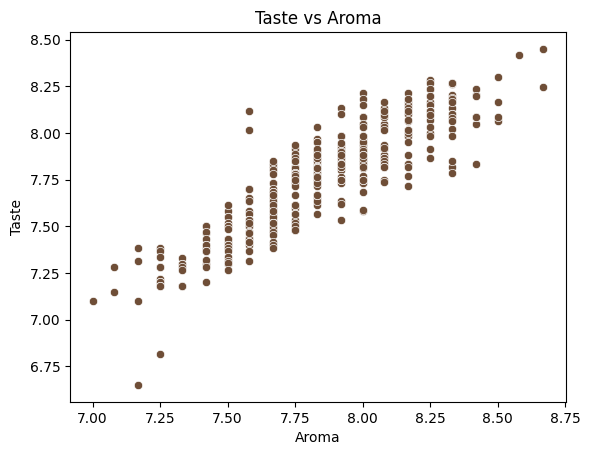

In [37]:
sns.scatterplot(x=df['Aroma'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Aroma')
plt.ylabel('Taste')
plt.title(f'Taste vs Aroma')
plt.show()

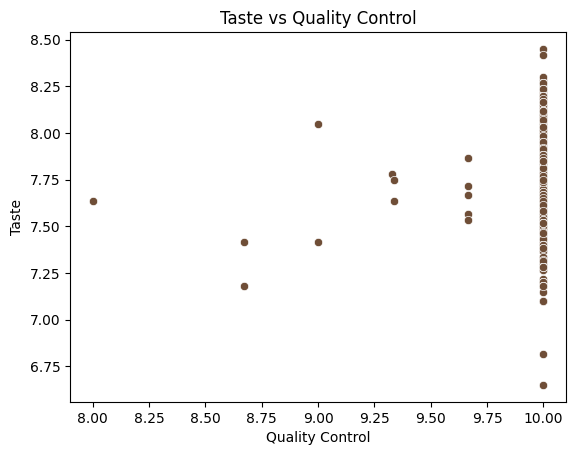

In [38]:
sns.scatterplot(x=df['Quality Control'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Quality Control')
plt.ylabel('Taste')
plt.title(f'Taste vs Quality Control')
plt.show()

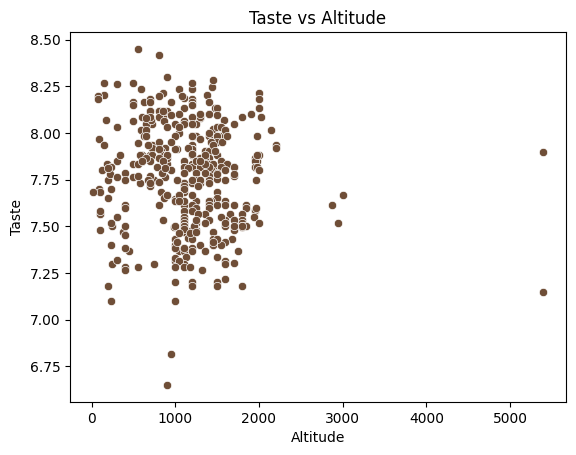

In [44]:
sns.scatterplot(x=df['Altitude'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Altitude')
plt.ylabel('Taste')
plt.title(f'Taste vs Altitude')
plt.show()

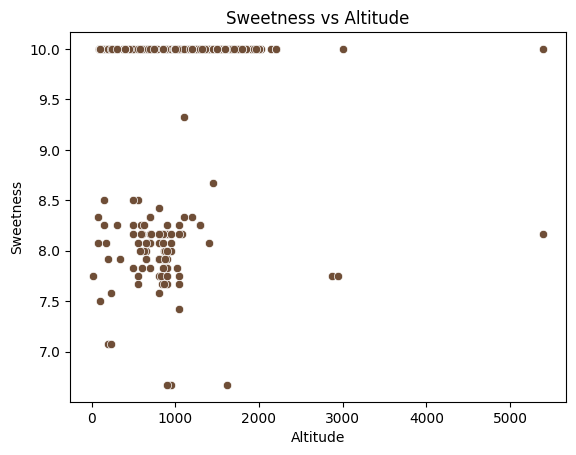

In [45]:
sns.scatterplot(x=df['Altitude'], y=df['Sweetness'], color='#6F4E37')
plt.xlabel('Altitude')
plt.ylabel('Sweetness')
plt.title(f'Sweetness vs Altitude')
plt.show()

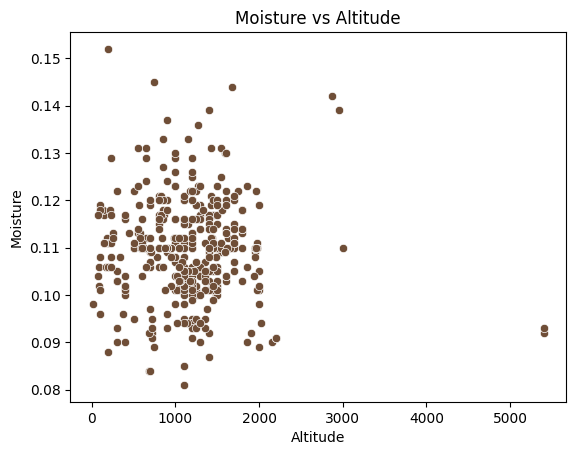

In [46]:
sns.scatterplot(x=df['Altitude'], y=df['Moisture'], color='#6F4E37')
plt.xlabel('Altitude')
plt.ylabel('Moisture')
plt.title(f'Moisture vs Altitude')
plt.show()

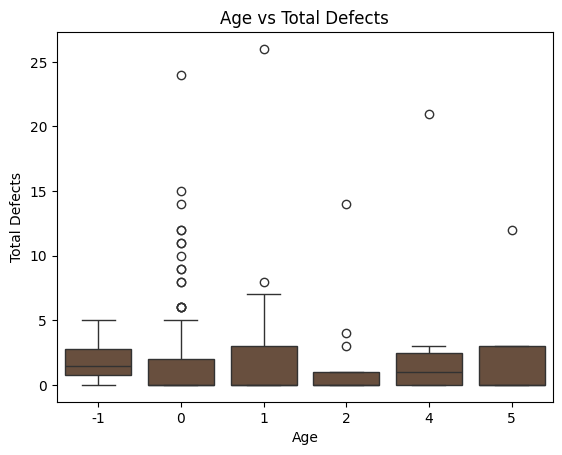

In [48]:
sns.boxplot(x=df['Age'], y=df['Total Defects'], color='#6F4E37')
plt.xlabel('Age')
plt.ylabel('Total Defects')
plt.title(f'Age vs Total Defects')
plt.show()

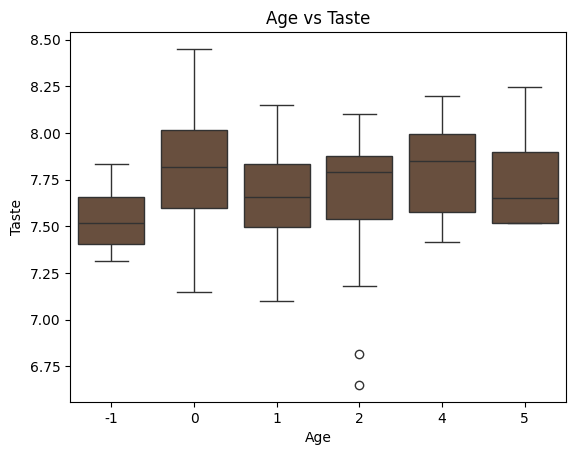

In [49]:
sns.boxplot(x=df['Age'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Age')
plt.ylabel('Taste')
plt.title(f'Age vs Taste')
plt.show()

In [31]:
# standardizing
from sklearn.preprocessing import StandardScaler
num_cols = df2.select_dtypes(include='number').columns
scaler = StandardScaler()
df2[num_cols] = scaler.fit_transform(df2[num_cols])


/tmp/ipython-input-2483834052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[num_cols] = scaler.fit_transform(df2[num_cols])


In [32]:
display(df2)

,Species,Taste,Aroma,Quality Control,Sweetness,Moisture,Total Defects,Age,Altitude
0,Arabica,1.731353,2.666965,0.154254,0.539849,0.221277,-0.564245,4.849281,0.504869
1,Arabica,1.858351,1.309197,0.154254,0.539849,0.126140,-0.564245,-0.494499,0.516829
2,Arabica,1.569078,1.858770,0.154254,0.539849,-1.205785,-0.564245,-0.494499,0.388686
3,Arabica,1.681965,1.309197,0.154254,0.539849,1.838614,-0.564245,-0.494499,0.089685
4,Arabica,1.498524,1.567819,0.154254,0.539849,-1.396059,0.391484,3.780525,0.089685
...,...,...,...,...,...,...,...,...,...
397,Robusta,-1.669364,-1.374013,0.154254,-2.113812,1.267790,-0.564245,-0.494499,-1.020889
398,Robusta,-2.029191,-1.923586,0.154254,-2.785768,-0.349547,0.072908,0.574257,-1.618891
399,Robusta,-2.311408,-2.731782,0.154254,-2.785768,-0.349547,0.072908,0.574257,-1.564216
400,Robusta,-3.313279,-1.923586,0.154254,-3.252722,-0.159272,-0.564245,1.643013,-0.337459
